In [1]:
import pandas as pd
import numpy as np
import string 
import spacy 
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
import re
from matplotlib import pyplot
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
#loading the dataset in variable df
df= pd.read_csv("Final_Predicted_FIFA_Overall.csv",encoding='latin1')
df.head()

,Name,Club,Position,Overall,Predicted Overall
0,Bruno Fernandes,Manchester United,CAM,88,87.67
1,L. Goretzka,FC Bayern MÃÂ¼nchen,CM,87,87.10
2,L. SuÃÂ¡rez,AtlÃÂ©tico de Madrid,CF,88,88.92
3,K. De Bruyne,Manchester City,CM,91,90.59
4,M. AcuÃÂ±a,Sevilla FC,LB,84,83.94


# TEAM STRENGTH & OPPOSITION STRENGTH 
## BASED ON ALL PLAYERS IN DATASET

## Home Team: REAL MADRID
### Actual Overall & Predicted strength (Based on all players in the team)

In [3]:
# Assuming 'df' is your dataset with 'Club', 'Overall', and 'Predicted Overall' columns
# Calculate the average 'Overall' and 'Predicted Overall' for each club
team_strength = df.groupby('Club')[['Overall', 'Predicted Overall']].mean().reset_index()
team_strength.columns = ['Club', 'Actual Overall Strength', 'Predicted Overall Strength']

# Filter for Clubs from Top 5 Leagues
selected_clubs = ['Real Madrid CF']
filtered_team_strength = team_strength[team_strength['Club'].isin(selected_clubs)]

# Sort the values from large to small based on 'Team Overall Strength'
filtered_team_strength_sorted = filtered_team_strength.sort_values(by='Predicted Overall Strength', ascending=False)

# Print the team strength and predicted overall for the selected clubs
print("Actual Overall Strength and Predicted Overall Strength for Selected Clubs:")
print(filtered_team_strength_sorted)

Actual Overall Strength and Predicted Overall Strength for Selected Clubs:
               Club  Actual Overall Strength  Predicted Overall Strength
637  Real Madrid CF                76.052632                   76.288421


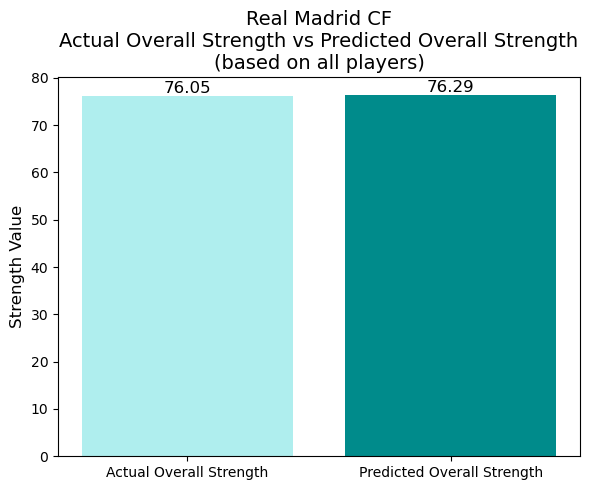

In [4]:
# Data: Real Madrid CF Team Strength and Predicted Strength
categories = ['Actual Overall Strength', 'Predicted Overall Strength']
values = [76.052632, 76.288421]

# Bar plot to compare Team Overall and Predicted Strength
plt.figure(figsize=(6, 5))  # Set figure size

# Create the bar chart
bars = plt.bar(categories, values, color=['#AFEEEE', '#008B8B'])

# Add title and labels
plt.title('Real Madrid CF\nActual Overall Strength vs Predicted Overall Strength\n(based on all players)', fontsize=14)
plt.ylabel('Strength Value', fontsize=12)

# Add the value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)  # Adjusted position

# Show the plot
plt.tight_layout()
plt.show()

## OPPOSITION TEAMS FROM TOP 5 LEAGUES
### Actual Overall Strength (Based on all players in the team)

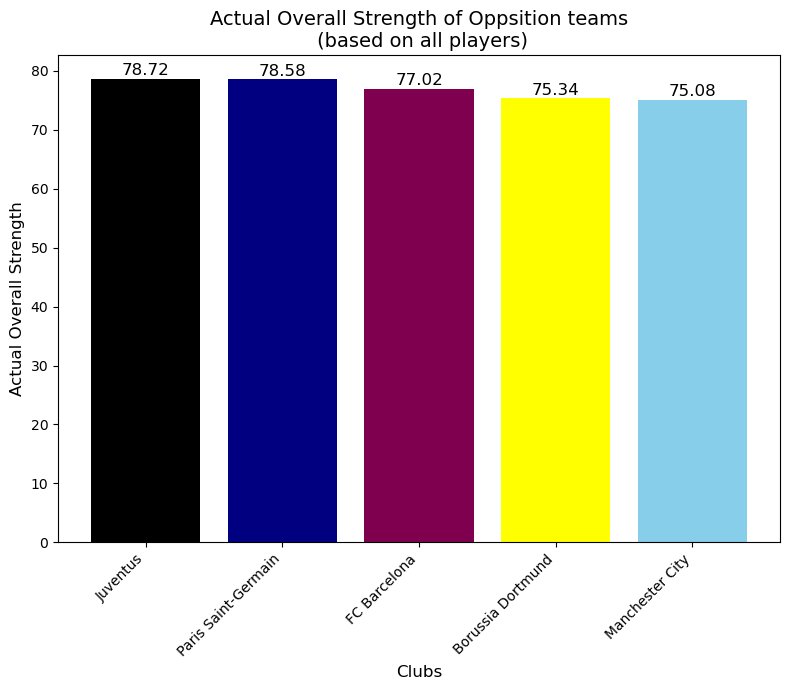

In [5]:
# Data: Team Overall Strength
clubs = ['Juventus', 'Paris Saint-Germain', 'FC Barcelona', 'Borussia Dortmund', 'Manchester City']
team_overall_strength = [78.72, 78.58, 77.02, 75.34, 75.08]

# Bar plot to visualize Team Overall Strength
plt.figure(figsize=(8, 7))  # Set figure size

# Adding different colors for each bar
bars = plt.bar(clubs, team_overall_strength, color=['black', 'navy', '#800050', 'yellow', 'skyblue'])

# Add title and labels
plt.title('Actual Overall Strength of Oppsition teams\n (based on all players)', fontsize=14)
plt.xlabel('Clubs', fontsize=12)
plt.ylabel('Actual Overall Strength', fontsize=12)

# Add the value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)  # Adjusted position

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

### Opposition teams Predicted Overall Strength (Based on all players in the team)

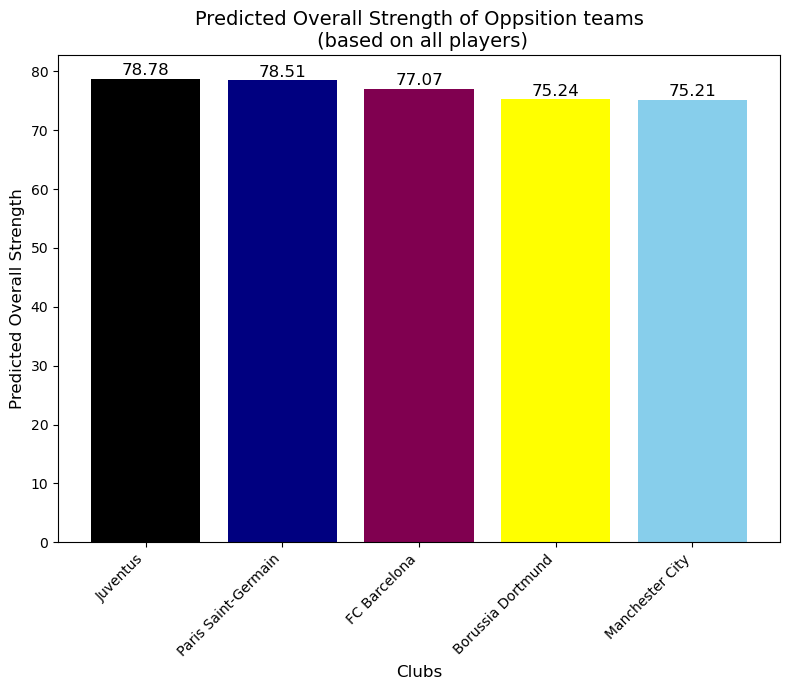

In [6]:
# Data: Team Overall Strength
clubs = ['Juventus', 'Paris Saint-Germain', 'FC Barcelona', 'Borussia Dortmund', 'Manchester City']
team_overall_strength = [78.78, 78.51, 77.07, 75.24, 75.21]

# Bar plot to visualize Opposing Teams Predicted Overall Strength
plt.figure(figsize=(8, 7))  # Set figure size

# Adding different colors for each bar
bars = plt.bar(clubs, team_overall_strength, color=['black', 'navy', '#800050', 'yellow', 'skyblue'])

# Add title and labels
plt.title('Predicted Overall Strength of Oppsition teams\n (based on all players)', fontsize=14)
plt.xlabel('Clubs', fontsize=12)
plt.ylabel('Predicted Overall Strength', fontsize=12)

# Add the value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)  # Adjusted position

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

# REAL MADRID VS OPPOSITION STRENGTH

In [7]:
# Assuming 'df' is your dataset with 'Club', 'Overall', and 'Predicted Overall' columns
# Calculate the average 'Overall' and 'Predicted Overall' for each club
team_strength = df.groupby('Club')[['Overall', 'Predicted Overall']].mean().reset_index()
team_strength.columns = ['Club', 'Actual Overall Strength', 'Predicted Overall Strength']

# Filter for Clubs from Top 5 Leagues
selected_clubs = ['Real Madrid CF', 'FC Barcelona', 'Manchester City','Paris Saint-Germain','Borussia Dortmund','Juventus']
filtered_team_strength = team_strength[team_strength['Club'].isin(selected_clubs)]

# Sort the values from large to small based on 'Team Overall Strength'
filtered_team_strength_sorted = filtered_team_strength.sort_values(by='Predicted Overall Strength', ascending=False)

# Print the team strength and predicted overall for the selected clubs
print("Actual Overall Strength and Predicted Overall Strength for Home & Oppisition Teams")
print(filtered_team_strength_sorted)

Actual Overall Strength and Predicted Overall Strength for Home & Oppisition Teams
                    Club  Actual Overall Strength  Predicted Overall Strength
467             Juventus                78.727273                   78.786061
592  Paris Saint-Germain                78.585366                   78.511951
309         FC Barcelona                77.025000                   77.070000
637       Real Madrid CF                76.052632                   76.288421
116    Borussia Dortmund                75.342857                   75.242857
525      Manchester City                75.081081                   75.214324


In [8]:
# Create a DataFrame for the selected clubs and their team strength and predicted overall
team_strength = {
    'Club': ['Real Madrid CF', 'FC Barcelona', 'Manchester City','Paris Saint-Germain','Borussia Dortmund','Juventus'],
    'Actual Overall Strength': [76.052,77.025, 75.081, 78.585,75.342,78.727],  # Replace with actual values if needed
    'Predicted Overall Strength': [76.288,77.070, 75.214, 78.511,75.242,78.786]
}

# Convert it into a DataFrame
df_team_strength = pd.DataFrame(team_strength)

# Set Real Madrid CF as the Home team
home_team = df_team_strength[df_team_strength['Club'] == 'Real Madrid CF']

# Instead of converting the Series directly, use iloc[0] to access the first element
df_team_strength['Predicted Strength Difference'] = df_team_strength['Predicted Overall Strength'] - float(home_team['Predicted Overall Strength'].iloc[0])

# Filter out Real Madrid CF to compare with opposition
df_opposition = df_team_strength[df_team_strength['Club'] != 'Real Madrid CF']

# Print the results
print("Comparison of Real Madrid's Predicted Team Strength vs Opposition:")
print(df_opposition[['Club', 'Predicted Strength Difference']])


Comparison of Real Madrid's Predicted Team Strength vs Opposition:
                  Club  Predicted Strength Difference
1         FC Barcelona                          0.782
2      Manchester City                         -1.074
3  Paris Saint-Germain                          2.223
4    Borussia Dortmund                         -1.046
5             Juventus                          2.498


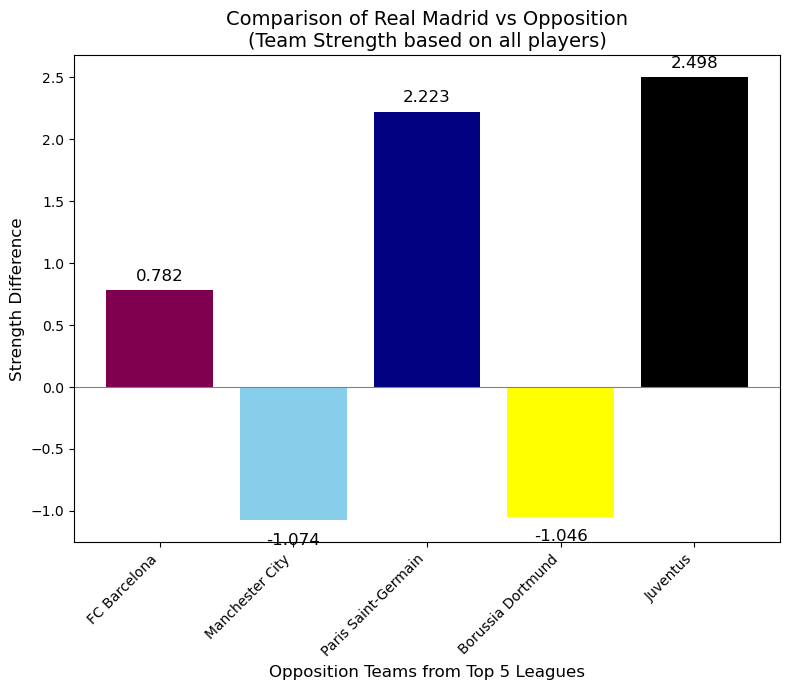

In [56]:
# Data: Real Madrid's Predicted Team Strength vs Opposition
clubs = ['FC Barcelona', 'Manchester City', 'Paris Saint-Germain', 'Borussia Dortmund', 'Juventus']
predicted_strength_diff = [0.782, -1.074, 2.223, -1.046, 2.498]

# Bar plot to visualize the comparison of Real Madrid vs opposition
plt.figure(figsize=(8, 7))  # Increased figure size for better readability

# Create the bar chart
bars = plt.bar(clubs, predicted_strength_diff, color=['#800050', 'skyblue', 'navy', 'yellow', 'black'])

# Add title and labels
plt.title('Comparison of Real Madrid vs Opposition\n(Team Strength based on all players)', fontsize=14)
plt.xlabel('Opposition Teams from Top 5 Leagues', fontsize=12)
plt.ylabel('Strength Difference', fontsize=12)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05 if yval > 0 else yval - 0.1, 
             f'{yval:.3f}', ha='center', va='bottom' if yval > 0 else 'top', fontsize=12)

# Add horizontal line at y=0 for easier comparison
plt.axhline(0, color='gray', linewidth=0.8)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Ensure everything fits into the figure
plt.show()

# 1. Avg 'Actual Overall' for Real Madrid CF based on key players
## Matching with SoFifa FIFA 22 (Sep 23 2021)

In [10]:
# Filter the dataset to include only "Real Madrid CF" players
real_madrid_players = df[df['Club'] == 'Real Madrid CF']

# Further filter players whose "Overall" is greater than or equal to 80
key_players = real_madrid_players[real_madrid_players['Overall'] >= 80]

# Sort the key players by 'Overall' in descending order (largest to smallest)
key_players_sorted = key_players.sort_values(by='Overall', ascending=False)

# Print the names and "Overall" of those players
print("Players with 'Actual Overall' >= 80 (sorted from largest to smallest):")
print(key_players_sorted[['Name', 'Overall']])

# Calculate the average "Overall" for these key players
average_overall = key_players_sorted['Overall'].mean()

# Print the calculated average
print(f"\nAverage 'Actual Overall' for Real Madrid CF based on key players: {average_overall:.2f}")

Players with 'Actual Overall' >= 80 (sorted from largest to smallest):
                    Name  Overall
10            K. Benzema       89
28              Casemiro       89
13           T. Courtois       89
74              T. Kroos       88
79          L. ModriÃÂ       87
107            E. Hazard       85
116             Carvajal       85
117             D. Alaba       84
443          F. Valverde       83
635             F. Mendy       83
184        Marco Asensio       83
300                 Isco       82
201              G. Bale       82
146   ÃÂder MilitÃÂ£o       82
486     Lucas VÃÂ¡zquez       81
755   Nacho FernÃÂ¡ndez       81
793      VinÃÂ­cius Jr.       80
1282             Marcelo       80

Average 'Actual Overall' for Real Madrid CF based on key players: 84.06


# 1. Avg Predicted Overall' for Real Madrid CF based on key players

In [11]:
# Filter the dataset to include only "Real Madrid CF" players
real_madrid_players = df[df['Club'] == 'Real Madrid CF']

# Further filter players whose "Overall" is greater than or equal to 80
key_players = real_madrid_players[real_madrid_players['Overall'] >= 80]

# Sort the key players by 'Predicted Overall' in descending order (largest to smallest)
key_players_sorted = key_players.sort_values(by='Predicted Overall', ascending=False)

# Print the names "Predicted Overall" of those players
print("Players with 'Predicted Overall' >= 80 (sorted from largest to smallest):")
print(key_players_sorted[['Name', 'Predicted Overall']])

# Calculate the average "Predicted Overall" for these key players
average_predicted_overall = key_players_sorted['Predicted Overall'].mean()

# Print the calculated average for the predicted overall
print(f"\nAverage 'Predicted Overall' for Real Madrid CF based on key players: {average_predicted_overall:.2f}")


Players with 'Predicted Overall' >= 80 (sorted from largest to smallest):
                    Name  Predicted Overall
10            K. Benzema              91.17
13           T. Courtois              88.90
28              Casemiro              88.90
74              T. Kroos              87.30
79          L. ModriÃÂ              87.15
107            E. Hazard              87.04
116             Carvajal              85.11
117             D. Alaba              83.90
146   ÃÂder MilitÃÂ£o              83.60
184        Marco Asensio              83.10
201              G. Bale              82.10
300                 Isco              81.82
443          F. Valverde              81.39
486     Lucas VÃÂ¡zquez              81.03
635             F. Mendy              80.59
755   Nacho FernÃÂ¡ndez              80.24
793      VinÃÂ­cius Jr.              80.01
1282             Marcelo              79.90

Average 'Predicted Overall' for Real Madrid CF based on key players: 84.07


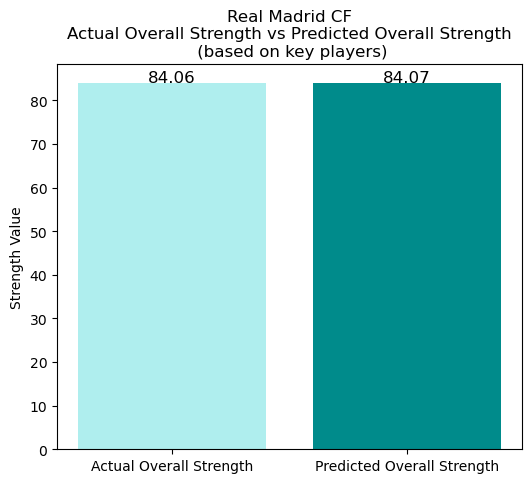

In [12]:
# Define the data
categories = ['Actual Overall Strength', 'Predicted Overall Strength']
averages = [84.06, 84.07]  # Replace these with your actual calculated values if needed

# Create the bar chart
plt.figure(figsize=(6, 5))
plt.bar(categories, averages, color=['#AFEEEE', '#008B8B'])

# Add labels and title
plt.ylabel('Strength Value')
plt.title('Real Madrid CF\nActual Overall Strength vs Predicted Overall Strength\n (based on key players)')

# Annotate the values on the bars
for i, val in enumerate(averages):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center', fontsize=12)

# Show the plot
plt.show()

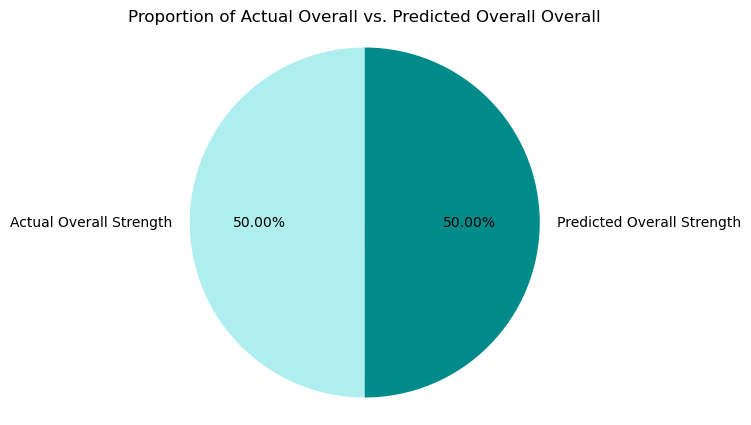

In [13]:
# Define the data
labels = ['Actual Overall Strength', 'Predicted Overall Strength']
sizes = [84.06, 84.07]  # Replace with your actual values

# Create the pie chart
plt.figure(figsize=(6, 5))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=['#AFEEEE', '#008B8B'], startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

# Add a title
plt.title('Proportion of Actual Overall vs. Predicted Overall Overall')

# Show the plot
plt.show()

# 2. Avg Actual Overall' for FC Barcelona based on key players
## Matching with SoFifa FIFA 22 (Sep 23 2021)

In [14]:
# Filter the dataset to include only "FC Barcelona" players
barcelona_players = df[df['Club'] == 'FC Barcelona']

# Exclude specific players using partial name matching (to handle encoding issues)
barcelona_players = barcelona_players[~barcelona_players['Name'].str.contains('Malcom|Puyol|Thuram|Xavi', regex=True)]

# Further filter players whose "Overall" is greater than or equal to 80
key_players = barcelona_players[barcelona_players['Overall'] >= 80]

# Sort the key players by 'Overall' in descending order (largest to smallest)
key_players_sorted = key_players.sort_values(by='Overall', ascending=False)

# Print the names and "Overall" of those players
print("Players with 'Actual Overall' >= 80 (sorted from largest to smallest):")
print(key_players_sorted[['Name', 'Overall']])

# Calculate the average "Overall" for these key players
average_overall = key_players_sorted['Overall'].mean()

# Print the calculated average
print(f"\nAverage 'Actual Overall' for FC Barcelona based on key players: {average_overall:.2f}")


Players with 'Actual Overall' >= 80 (sorted from largest to smallest):
                  Name  Overall
17       M. ter Stegen       90
32          F. de Jong       87
244       S. AgÃÂ¼ero       87
317         Jordi Alba       86
390    Sergio Busquets       86
396           M. Depay       85
703           PiquÃÂ©       84
731   O. DembÃÂ©lÃÂ©       83
1171          Coutinho       82
1225        C. Lenglet       82
1309              Neto       82
2263     Sergi Roberto       81
2308             Pedri       81
2526         S. Umtiti       80

Average 'Actual Overall' for FC Barcelona based on key players: 84.00


# 2. Avg Predicted Overall' for Barcelona based on key players

In [15]:
# Filter the dataset to include only "FC Barcelona" players
barcelona_players = df[df['Club'] == 'FC Barcelona']

# Exclude specific players using partial name matching (to handle encoding issues)
barcelona_players = barcelona_players[~barcelona_players['Name'].str.contains('Malcom|Puyol|Thuram|Xavi', regex=True)]

# Further filter players whose "Overall" is greater than or equal to 80
key_players = barcelona_players[barcelona_players['Overall'] >= 80]

# Sort the key players by 'Overall' in descending order (largest to smallest)
key_players_sorted = key_players.sort_values(by='Predicted Overall', ascending=False)

# Print the names "Predicted Overall" of those players
print("Players with 'Predicted Overall' >= 80 (sorted from largest to smallest):")
print(key_players_sorted[['Name', 'Predicted Overall']])

# Calculate the average "Predicted Overall" for these key players
average_predicted_overall = key_players_sorted['Predicted Overall'].mean()

# Print the calculated average for the predicted overall
print(f"\nAverage 'Predicted Overall' for FC Barcelona based on key players: {average_predicted_overall:.2f}")


Players with 'Predicted Overall' >= 80 (sorted from largest to smallest):
                  Name  Predicted Overall
17       M. ter Stegen              89.90
32          F. de Jong              86.98
244       S. AgÃÂ¼ero              86.90
317         Jordi Alba              85.90
396           M. Depay              84.90
703           PiquÃÂ©              83.94
390    Sergio Busquets              82.99
731   O. DembÃÂ©lÃÂ©              82.90
1171          Coutinho              82.10
1225        C. Lenglet              81.90
1309              Neto              81.90
2263     Sergi Roberto              80.90
2308             Pedri              80.54
2526         S. Umtiti              79.36

Average 'Predicted Overall' for FC Barcelona based on key players: 83.65


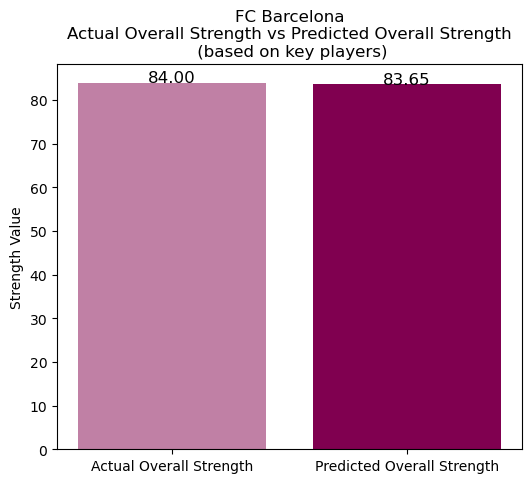

In [16]:
# Define the data
categories = ['Actual Overall Strength', 'Predicted Overall Strength']
averages = [84.00, 83.65]  # Replace these with your actual calculated values if needed

# Create the bar chart
plt.figure(figsize=(6, 5))
plt.bar(categories, averages, color=['#C080A5','#800050'])

# Add labels and title
plt.ylabel('Strength Value')
plt.title('FC Barcelona\nActual Overall Strength vs Predicted Overall Strength\n (based on key players)')

# Annotate the values on the bars
for i, val in enumerate(averages):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center', fontsize=12)

# Show the plot
plt.show()

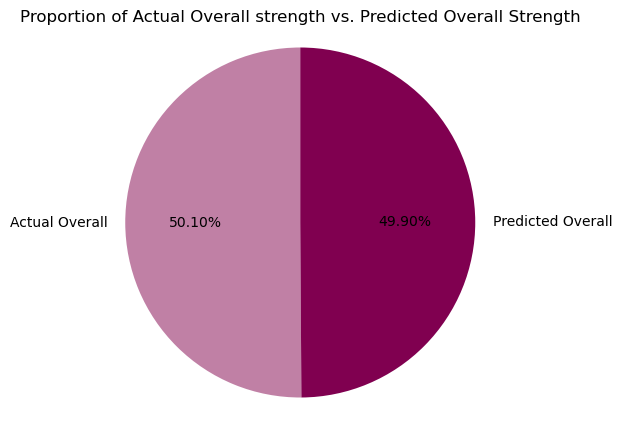

In [44]:
# Define the data
labels = ['Actual Overall', 'Predicted Overall']
sizes = [84, 83.65]  # Replace with your actual values

# Create the pie chart
plt.figure(figsize=(6, 5))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=['#C080A5', '#800050'], startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

# Add a title
plt.title('Proportion of Actual Overall strength vs. Predicted Overall Strength')

# Show the plot
plt.show()

# 3. Avg Actual Overall' for Manchester City based on key players
## Matching with SoFifa FIFA 22 (Sep 23 2021)

In [18]:
# Filter the dataset to include only "Manchester City" players
city_players = df[df['Club'] == 'Manchester City']

# Further filter players whose "Overall" is greater than or equal to 80
key_players = city_players[city_players['Overall'] >= 80]

# Sort the key players by 'Overall' in descending order (largest to smallest)
key_players_sorted = key_players.sort_values(by='Overall', ascending=False)

# Print the names and "Overall" of those players
print("Players with 'Actual Overall' >= 80 (sorted from largest to smallest):")
print(key_players_sorted[['Name', 'Overall']])

# Calculate the average "Overall" for these key players
average_overall = key_players_sorted['Overall'].mean()

# Print the calculated average
print(f"\nAverage 'Actual Overall' for Manchester City based on key players: {average_overall:.2f}")

Players with 'Actual Overall' >= 80 (sorted from largest to smallest):
                    Name  Overall
3           K. De Bruyne       91
11192            Ederson       89
220          R. Sterling       88
2754       RÃÂºben Dias       87
170       Bernardo Silva       86
265                Rodri       86
21       JoÃÂ£o Cancelo       86
606            R. Mahrez       86
1199          A. Laporte       86
47     I. GÃÂ¼ndoÃÂan       85
53             K. Walker       85
444             P. Foden       84
713          J. Grealish       84
142          Fernandinho       83
1453           J. Stones       83
436        Gabriel Jesus       83
967        Ferran Torres       82
123         O. Zinchenko       80

Average 'Actual Overall' for Manchester City based on key players: 85.22


# 3. Avg Predicted Overall for Manchester City based on key players

In [19]:
# Filter the dataset to include only "Manchester City" players
city_players = df[df['Club'] == 'Manchester City']

# Exclude players using partial name matching (to handle encoding issues)
city_players = city_players[~city_players['Name'].str.contains('Vieira', regex=True)]

# Further filter players whose "Overall" is greater than or equal to 80
key_players = city_players[city_players['Predicted Overall'] >= 80]

# Sort the key players by 'Overall' in descending order (largest to smallest)
key_players_sorted = key_players.sort_values(by='Predicted Overall', ascending=False)

# Print the names and "Predicted Overall" of those players
print("Players with 'Predicted Overall' >= 80 (sorted from largest to smallest):")
print(key_players_sorted[['Name', 'Predicted Overall']])

# Calculate the average "Overall" for these key players
average_predicted_overall = key_players_sorted['Predicted Overall'].mean()

# Print the calculated average
print(f"\nAverage 'Predicted Overall' for Manchester City based on key players: {average_predicted_overall:.2f}")

Players with 'Predicted Overall' >= 80 (sorted from largest to smallest):
                    Name  Predicted Overall
3           K. De Bruyne              90.59
11192            Ederson              88.60
220          R. Sterling              87.07
1199          A. Laporte              86.51
606            R. Mahrez              85.96
170       Bernardo Silva              85.90
265                Rodri              85.63
21       JoÃÂ£o Cancelo              85.35
2754       RÃÂºben Dias              85.31
47     I. GÃÂ¼ndoÃÂan              84.90
53             K. Walker              84.90
444             P. Foden              84.20
436        Gabriel Jesus              83.75
713          J. Grealish              83.72
1453           J. Stones              83.10
142          Fernandinho              82.90
967        Ferran Torres              81.82
123         O. Zinchenko              81.58

Average 'Predicted Overall' for Manchester City based on key players: 85.10


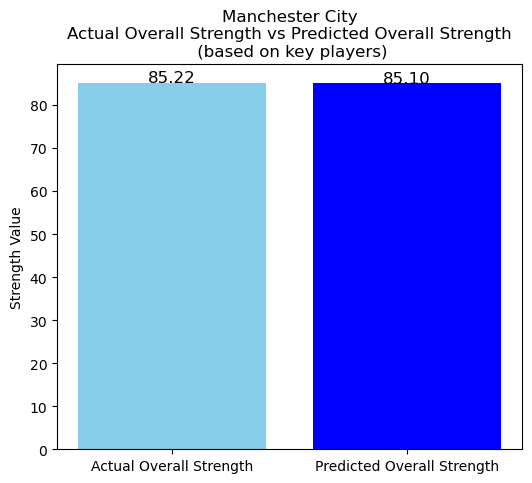

In [41]:
# Define the data
categories = ['Actual Overall Strength', 'Predicted Overall Strength']
averages = [85.22, 85.10]  # Replace these with your actual calculated values if needed

# Create the bar chart
plt.figure(figsize=(6, 5))
plt.bar(categories, averages, color=['skyblue','blue'])

# Add labels and title
plt.ylabel('Strength Value')
plt.title('Manchester City\nActual Overall Strength vs Predicted Overall Strength\n (based on key players)')

# Annotate the values on the bars
for i, val in enumerate(averages):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center', fontsize=12)

# Show the plot
plt.show()

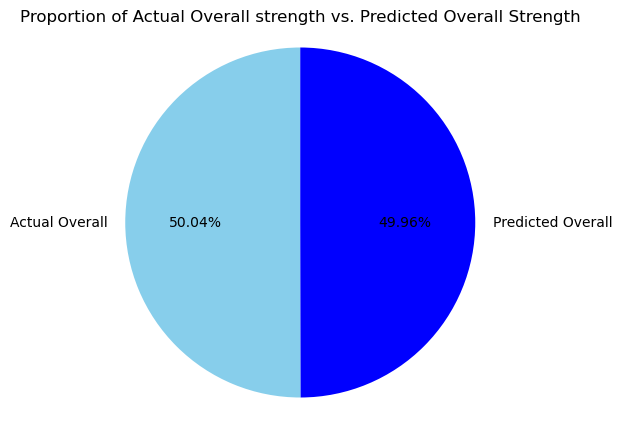

In [45]:
# Define the data
labels = ['Actual Overall', 'Predicted Overall']
sizes = [85.22, 85.10]  # Replace with your actual values

# Create the pie chart
plt.figure(figsize=(6, 5))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=['skyblue','blue'], startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

# Add a title
plt.title('Proportion of Actual Overall strength vs. Predicted Overall Strength')

# Show the plot
plt.show()

# 4. Avg Actual Overall' for Paris Saint-Germain based on key players
## Matching with SoFifa FIFA 22 (Sep 23 2021)

In [22]:
# Filter the dataset to include only "Paris Saint-Germain" players
psg_players = df[df['Club'] == 'Paris Saint-Germain']

# Exclude specific players using partial name matching (to handle encoding issues)
psg_players = psg_players[~psg_players['Name'].str.contains('Motta|Dani Alves', regex=True)]

# Further filter players whose "Overall" is greater than or equal to 80
key_players = psg_players[psg_players['Overall'] >= 80]

# Sort the key players by 'Overall' in descending order (largest to smallest)
key_players_sorted = key_players.sort_values(by='Overall', ascending=False)

# Print the names and "Overall" of those players
print("Players with 'Actual Overall' >= 80 (sorted from largest to smallest):")
print(key_players_sorted[['Name', 'Overall']])

# Calculate the average "Overall" for these key players
average_overall = key_players_sorted['Overall'].mean()

# Print the calculated average
print(f"\nAverage 'Actual Overall' for Paris Saint-Germain based on key players: {average_overall:.2f}")

Players with 'Actual Overall' >= 80 (sorted from largest to smallest):
                 Name  Overall
29           L. Messi       93
64          Neymar Jr       91
82       K. MbappÃÂ©       91
14608   G. Donnarumma       89
14087        K. Navas       88
12       Sergio Ramos       88
371        Marquinhos       87
42        M. Verratti       87
76     A. Di MarÃÂ­a       87
58          A. Hakimi       85
7        G. Wijnaldum       84
1574      P. Kimpembe       83
1959        M. Icardi       83
247          I. Gueye       82
181       Juan Bernat       82
682    Danilo Pereira       81
81         L. Paredes       81
365        J. Draxler       80
185           Rafinha       80

Average 'Actual Overall' for Paris Saint-Germain based on key players: 85.37


# 4. Avg Predicted Overall for Paris Saint-Germain based on key players

In [23]:
# Filter the dataset to include only "Paris Saint-Germain" players
psg_players = df[df['Club'] == 'Paris Saint-Germain']

# Exclude specific players using partial name matching (to handle encoding issues)
psg_players = psg_players[~psg_players['Name'].str.contains('Motta|Dani Alves', regex=True)]

# Further filter players whose "Overall" is greater than or equal to 80
key_players = psg_players[psg_players['Overall'] >= 80]

# Sort the key players by 'Predicted Overall' in descending order (largest to smallest)
key_players_sorted = key_players.sort_values(by='Predicted Overall', ascending=False)

# Print the names and "Overall" of those players
print("Players with 'Predicted Overall' >= 80 (sorted from largest to smallest):")
print(key_players_sorted[['Name', 'Predicted Overall']])

# Calculate the average "Predicted Overall" for these key players
average_predicted_overall = key_players_sorted['Predicted Overall'].mean()

# Print the calculated average
print(f"\nAverage 'Predicted Overall' for Paris Saint-Germain based on key players: {average_predicted_overall:.2f}")

Players with 'Predicted Overall' >= 80 (sorted from largest to smallest):
                 Name  Predicted Overall
29           L. Messi              91.11
64          Neymar Jr              90.90
82       K. MbappÃÂ©              90.90
14608   G. Donnarumma              88.90
14087        K. Navas              88.10
76     A. Di MarÃÂ­a              86.90
371        Marquinhos              86.90
12       Sergio Ramos              86.87
42        M. Verratti              86.48
7        G. Wijnaldum              84.10
58          A. Hakimi              83.82
1574      P. Kimpembe              83.43
1959        M. Icardi              82.90
181       Juan Bernat              82.22
247          I. Gueye              81.90
81         L. Paredes              81.48
682    Danilo Pereira              81.01
365        J. Draxler              79.90
185           Rafinha              79.65

Average 'Predicted Overall' for Paris Saint-Germain based on key players: 85.13


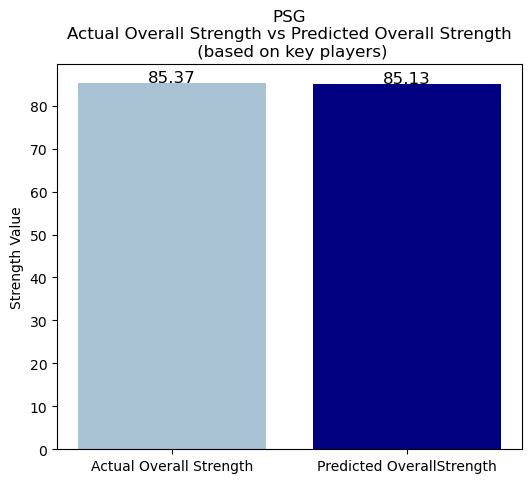

In [24]:
# Define the data
categories = ['Actual Overall Strength', 'Predicted OverallStrength']
averages = [85.37, 85.13]  # Replace these with your actual calculated values if needed

# Create the bar chart
plt.figure(figsize=(6, 5))
plt.bar(categories, averages, color=['#A9C2D4','navy'])

# Add labels and title
plt.ylabel('Strength Value')
plt.title('PSG\nActual Overall Strength vs Predicted Overall Strength\n (based on key players)')

# Annotate the values on the bars
for i, val in enumerate(averages):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center', fontsize=12)

# Show the plot
plt.show()

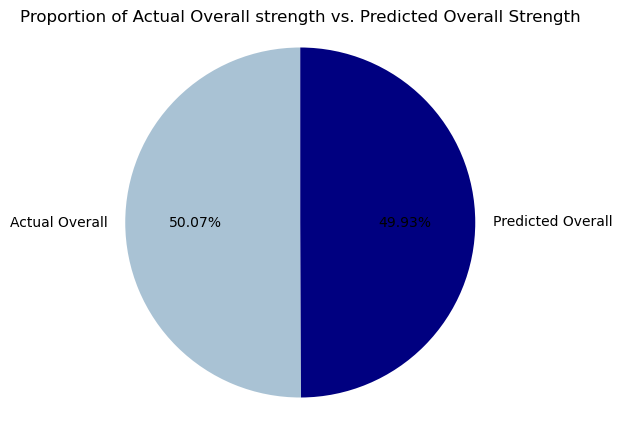

In [46]:
# Define the data
labels = ['Actual Overall', 'Predicted Overall']
sizes = [85.37, 85.13]  # Replace with your actual values

# Create the pie chart
plt.figure(figsize=(6, 5))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=['#A9C2D4','navy'], startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

# Add a title
plt.title('Proportion of Actual Overall strength vs. Predicted Overall Strength')

# Show the plot
plt.show()

# 5. Avg Actual Overall' for Borussia Dortmund based on key players
## Matching with SoFifa FIFA 22 (Sep 23 2021)

In [26]:
# Filter the dataset to include only "Borussia Dortmund" players
dortmund_players = df[df['Club'] == 'Borussia Dortmund']

# Further filter players whose "Overall" is greater than or equal to 80
key_players = dortmund_players[dortmund_players['Overall'] >= 80]

# Sort the key players by 'Overall' in descending order (largest to smallest)
key_players_sorted = key_players.sort_values(by='Overall', ascending=False)

# Print the names and "Overall" of those players
print("Players with 'Actual Overall' >= 80 (sorted from largest to smallest):")
print(key_players_sorted[['Name', 'Overall']])

# Calculate the average "Overall" for these key players
average_overall = key_players_sorted['Overall'].mean()

# Print the calculated average
print(f"\nAverage 'Actual Overall' for Borussia Dortmund based on key players: {average_overall:.2f}")

Players with 'Actual Overall' >= 80 (sorted from largest to smallest):
               Name  Overall
251      E. Haaland       88
556      M. Hummels       86
175         M. Reus       85
80     R. Guerreiro       84
94        A. Witsel       83
8            E. Can       82
305       T. Hazard       82
774       J. Brandt       81
1074       D. Malen       80
1756      M. Akanji       80
15276   R. BÃÂ¼rki       80

Average 'Actual Overall' for Borussia Dortmund based on key players: 82.82


# 5. Avg Predicted Overall for Borussia Dortmund based on key players

In [27]:
# Filter the dataset to include only "Borussia Dortmund" players
dortmund_players = df[df['Club'] == 'Borussia Dortmund']

# Further filter players whose "Predicted Overall" is greater than or equal to 80
key_players = dortmund_players[dortmund_players['Overall'] >= 80]

# Sort the key players by 'Overall' in descending order (largest to smallest)
key_players_sorted = key_players.sort_values(by='Predicted Overall', ascending=False)

# Print the names and "Predicted Overall" of those players
print("Players with 'Predicted Overall' >= 80 (sorted from largest to smallest):")
print(key_players_sorted[['Name', 'Predicted Overall']])

# Calculate the average "Predicted Overall" for these key players
average_predicted_overall = key_players_sorted['Predicted Overall'].mean()

# Print the calculated average
print(f"\nAverage 'Predicted Overall' for Borussia Dortmund based on key players: {average_predicted_overall:.2f}")

Players with 'Predicted Overall' >= 80 (sorted from largest to smallest):
               Name  Predicted Overall
556      M. Hummels              85.90
175         M. Reus              85.86
80     R. Guerreiro              83.76
251      E. Haaland              83.48
94        A. Witsel              83.04
8            E. Can              82.45
305       T. Hazard              81.71
774       J. Brandt              81.10
1074       D. Malen              80.76
15276   R. BÃÂ¼rki              80.37
1756      M. Akanji              79.90

Average 'Predicted Overall' for Borussia Dortmund based on key players: 82.58


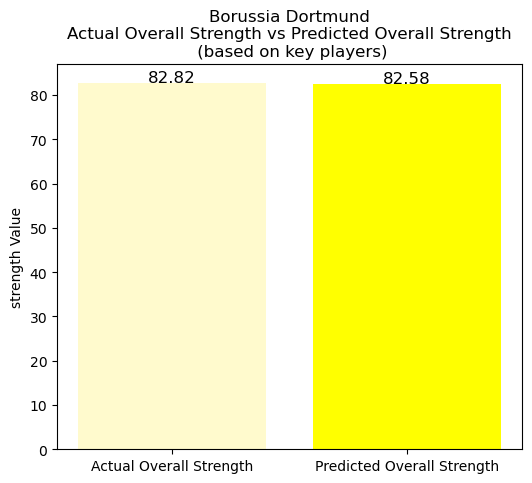

In [28]:
# Define the data
categories = ['Actual Overall Strength', 'Predicted Overall Strength']
averages = [82.82, 82.58]  # Replace these with your actual calculated values if needed

# Create the bar chart
plt.figure(figsize=(6, 5))
plt.bar(categories, averages, color=['#FFFACD','Yellow'])

# Add labels and title
plt.ylabel('strength Value')
plt.title('Borussia Dortmund\nActual Overall Strength vs Predicted Overall Strength\n (based on key players)')

# Annotate the values on the bars
for i, val in enumerate(averages):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center', fontsize=12)

# Show the plot
plt.show()

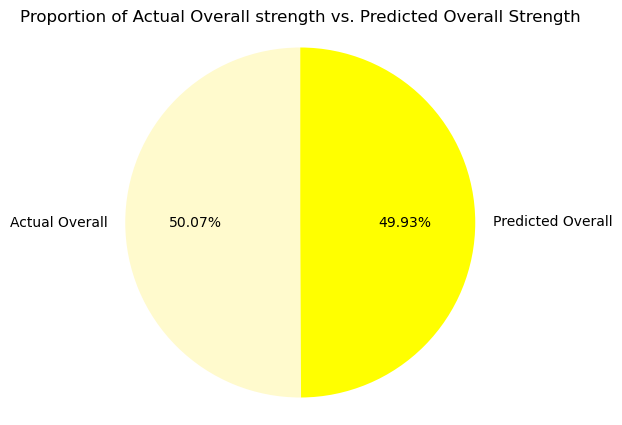

In [47]:
# Define the data
labels = ['Actual Overall', 'Predicted Overall']
sizes = [82.82, 82.58]  # Replace with your actual values

# Create the pie chart
plt.figure(figsize=(6, 5))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=['#FFFACD','Yellow'], startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

# Add a title
plt.title('Proportion of Actual Overall strength vs. Predicted Overall Strength')

# Show the plot
plt.show()

# 6. Avg Actual Overall' for Juventus based on key players
## Matching with SoFifa FIFA 22 (Sep 23 2021)

In [30]:
# Filter the dataset to include only "Juventus" players
juventus_players = df[df['Club'] == 'Juventus']

# Exclude specific players using partial name matching (to handle encoding issues)
juventus_players = juventus_players[~juventus_players['Name'].str.contains('Cannavaro|Barzagli|Marchisio', regex=True)]

# Further filter players whose "Overall" is greater than or equal to 80
key_players = juventus_players[juventus_players['Overall'] >= 80]

# Sort the key players by 'Overall' in descending order (largest to smallest)
key_players_sorted = key_players.sort_values(by='Overall', ascending=False)

# Print the names and "Overall" of those players
print("Players with 'Actual Overall' >= 80 (sorted from largest to smallest):")
print(key_players_sorted[['Name', 'Overall']])

# Calculate the average "Overall" for these key players
average_overall = key_players_sorted['Overall'].mean()

# Print the calculated average
print(f"\nAverage 'Actual Overall' for Juventus based on key players: {average_overall:.2f}")

Players with 'Actual Overall' >= 80 (sorted from largest to smallest):
                 Name  Overall
156         P. Dybala       87
14991  W. SzczÃÂsny       87
3560     G. Chiellini       86
1210       M. de Ligt       85
1214       L. Bonucci       85
19        J. Cuadrado       83
111            Arthur       83
118       Alex Sandro       83
505         F. Chiesa       83
1661           Morata       83
215      M. Locatelli       82
152         A. Rabiot       81
172            Danilo       81
297     D. Kulusevski       81
333         A. Ramsey       80
15186        M. Perin       80

Average 'Actual Overall' for Juventus based on key players: 83.12


# 6. Avg Predicted Overall for Juventus based on key players

In [31]:
# Filter the dataset to include only "Juventus" players
juventus_players = df[df['Club'] == 'Juventus']

# Exclude specific players using partial name matching (to handle encoding issues)
juventus_players = juventus_players[~juventus_players['Name'].str.contains('Cannavaro|Barzagli|Marchisio', regex=True)]

# Further filter players whose "Predicted Overall" is greater than or equal to 80
key_players = juventus_players[juventus_players['Overall'] >= 80]

# Sort the key players by 'Predicted Overall' in descending order (largest to smallest)
key_players_sorted = key_players.sort_values(by='Predicted Overall', ascending=False)

# Print the names and "Predicted Overall" of those players
print("Players with 'Predicted Overall' >= 80 (sorted from largest to smallest):")
print(key_players_sorted[['Name', 'Predicted Overall']])

# Calculate the average "Predicted Overall" for these key players
average_predicted_overall = key_players_sorted['Overall'].mean()

# Print the calculated average
print(f"\nAverage 'Predicted Overall' for Juventus based on key players: {average_predicted_overall:.2f}")

Players with 'Predicted Overall' >= 80 (sorted from largest to smallest):
                 Name  Predicted Overall
14991  W. SzczÃÂsny              87.04
156         P. Dybala              86.90
3560     G. Chiellini              85.41
1214       L. Bonucci              85.10
1210       M. de Ligt              84.90
505         F. Chiesa              83.10
118       Alex Sandro              82.92
19        J. Cuadrado              82.90
111            Arthur              82.90
1661           Morata              82.89
215      M. Locatelli              82.15
297     D. Kulusevski              81.10
152         A. Rabiot              80.90
172            Danilo              80.83
15186        M. Perin              80.43
333         A. Ramsey              79.91

Average 'Predicted Overall' for Juventus based on key players: 83.12


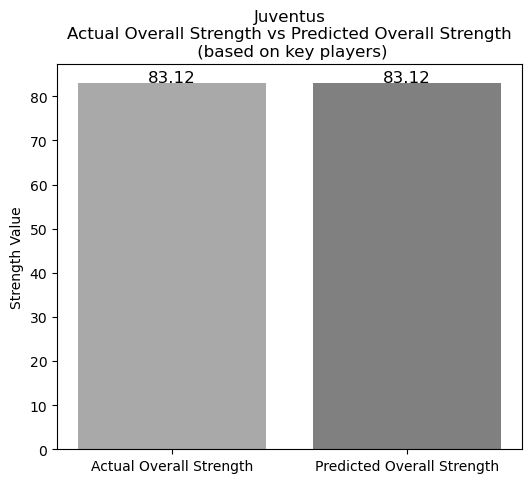

In [32]:
# Define the data
categories = ['Actual Overall Strength', 'Predicted Overall Strength']
averages = [83.12, 83.12]  # Replace these with your actual calculated values if needed

# Create the bar chart
plt.figure(figsize=(6, 5))
plt.bar(categories, averages, color=['darkgrey', 'grey'])

# Add labels and title
plt.ylabel('Strength Value')
plt.title('Juventus\nActual Overall Strength vs Predicted Overall Strength\n (based on key players)')

# Annotate the values on the bars
for i, val in enumerate(averages):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center', fontsize=12)

# Show the plot
plt.show()

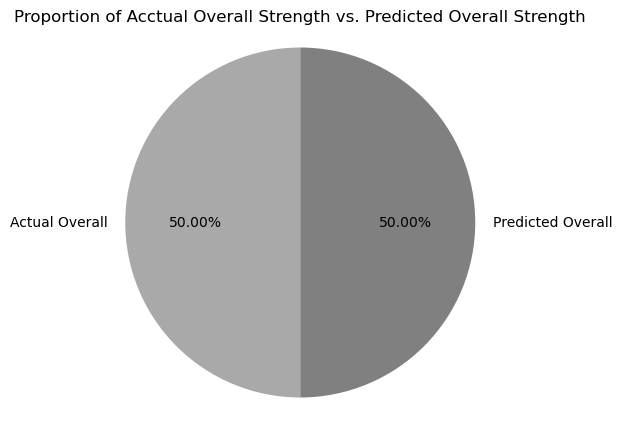

In [48]:
# Define the data
labels = ['Actual Overall', 'Predicted Overall']
sizes = [83.12, 83.12]  # Replace with your actual values

# Create the pie chart
plt.figure(figsize=(6, 5))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=['darkgrey', 'grey'], startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

# Add a title
plt.title('Proportion of Acctual Overall Strength vs. Predicted Overall Strength')

# Show the plot
plt.show()

# Real Madrid VS OPPOSITION STRENGTH based on key players

In [34]:
# Create a DataFrame for the selected clubs and their team strength and predicted overall
team_strength = {
    'Club': ['Real Madrid CF', 'FC Barcelona', 'Manchester City','Paris Saint-Germain','Borussia Dortmund','Juventus'],
    'Team Overall key players': [84.06,84, 85.22, 85.37,82.82,83.12],  # Replace with actual values if needed
    'Team Predicted key players': [84.07,83.65, 85.10, 85.13,82.58,83.12]
}

# Convert it into a DataFrame
df_team_strength = pd.DataFrame(team_strength)

# Set Real Madrid CF as the Home team
home_team = df_team_strength[df_team_strength['Club'] == 'Real Madrid CF']

# Instead of converting the Series directly, use iloc[0] to access the first element
df_team_strength['Predicted Strength Difference'] = df_team_strength['Team Predicted key players'] - float(home_team['Team Predicted key players'].iloc[0])

# Filter out Real Madrid CF to compare with opposition
df_opposition = df_team_strength[df_team_strength['Club'] != 'Real Madrid CF']

# Print the results
print("Comparison of Real Madrid's Predicted Team Strength vs Opposition based on key players:")
print(df_opposition[['Club', 'Predicted Strength Difference']])

Comparison of Real Madrid's Predicted Team Strength vs Opposition based on key players:
                  Club  Predicted Strength Difference
1         FC Barcelona                          -0.42
2      Manchester City                           1.03
3  Paris Saint-Germain                           1.06
4    Borussia Dortmund                          -1.49
5             Juventus                          -0.95


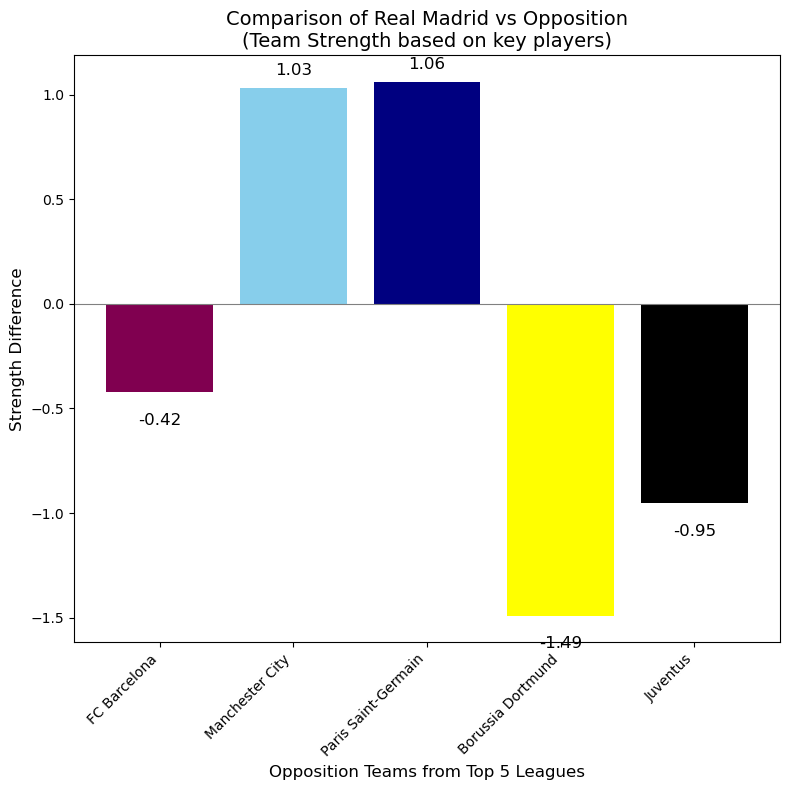

In [49]:
# Data: Real Madrid's Predicted Team Strength vs Opposition based on key players
clubs = ['FC Barcelona', 'Manchester City', 'Paris Saint-Germain', 'Borussia Dortmund', 'Juventus']
predicted_strength_diff = [-0.42, 1.03, 1.06, -1.49, -0.95]

# Bar plot to visualize the comparison of Real Madrid vs opposition
plt.figure(figsize=(8, 8))  # Increased figure size for better readability

# Create the bar chart
bars = plt.bar(clubs, predicted_strength_diff, color=['#800050', 'skyblue', 'navy', 'yellow', 'black'])

# Add title and labels
plt.title('Comparison of Real Madrid vs Opposition\n(Team Strength based on key players)', fontsize=14)
plt.xlabel('Opposition Teams from Top 5 Leagues', fontsize=12)
plt.ylabel('Strength Difference', fontsize=12)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05 if yval > 0 else yval - 0.1, 
             f'{yval:.2f}', ha='center', va='bottom' if yval > 0 else 'top', fontsize=12)

# Add horizontal line at y=0 for easier comparison
plt.axhline(0, color='gray', linewidth=0.8)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Ensure everything fits into the figure
plt.show()


# Player level Comparison

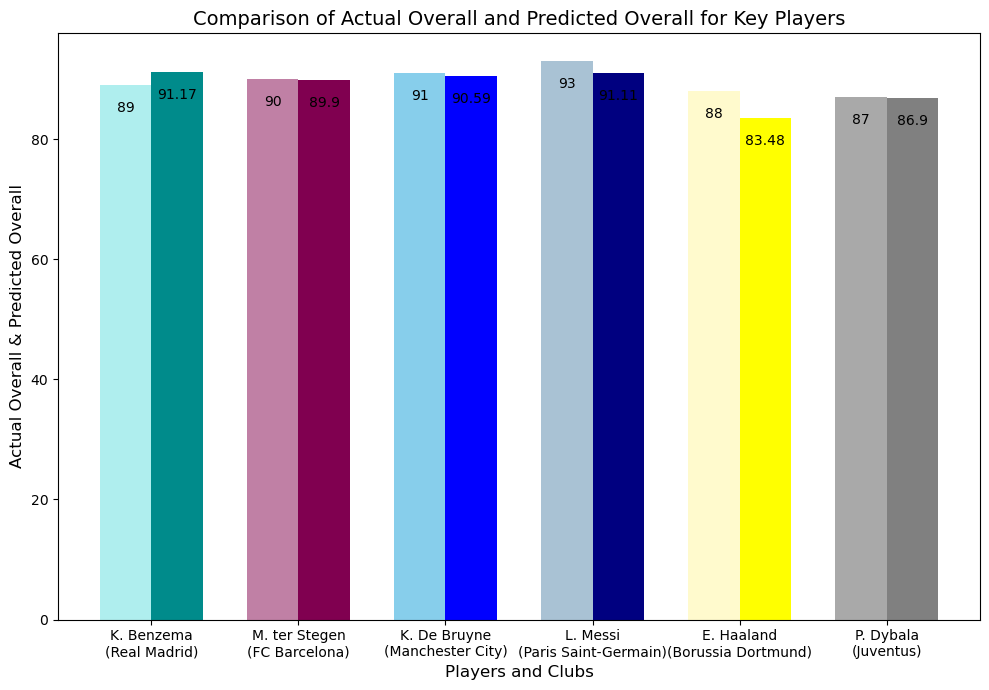

In [74]:
# Define key players data (Name, Overall, Predicted Overall, and Club Names)
players = ['K. Benzema', 'M. ter Stegen', 'K. De Bruyne', 'L. Messi', 'E. Haaland', 'P. Dybala']
clubs = ['Real Madrid', 'FC Barcelona', 'Manchester City', 'Paris Saint-Germain', 'Borussia Dortmund', 'Juventus']
overall = [89, 90, 91, 93, 88, 87]
predicted_overall = [91.17, 89.90, 90.59, 91.11, 83.48, 86.90]

# Define two different shades for each player's Overall and Predicted Overall (lighter and darker)
overall_colors = ['#AFEEEE', '#C080A5', 'skyblue', '#A9C2D4', '#FFFACD', 'darkgrey']  # For "Overall"
predicted_colors = ['#008B8B', '#800050', 'blue', 'navy', 'Yellow', 'grey']  # For "Predicted Overall"

# Combine player names and clubs for x-axis labels
x_labels = [f'{player}\n({club})' for player, club in zip(players, clubs)]

# Set the figure size
plt.figure(figsize=(10, 7))

# Width of each bar
bar_width = 0.35

# Bar positions for actual overall and predicted overall
index = np.arange(len(players))

# Plot the bars with different shades
bars1 = plt.bar(index, overall, bar_width, label='Overall', color=overall_colors)
bars2 = plt.bar(index + bar_width, predicted_overall, bar_width, label='Predicted Overall', color=predicted_colors)

# Set the labels and title
plt.xlabel('Players and Clubs', fontsize=12)
plt.ylabel('Actual Overall & Predicted Overall', fontsize=12)
plt.title('Comparison of Actual Overall and Predicted Overall for Key Players', fontsize=14)

# Set the x-ticks and add player names and club names
plt.xticks(index + bar_width / 2, x_labels)


# Add values on top of each bar for Overall
for i, bar in enumerate(bars1):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, f'{overall[i]}', ha='center', va='bottom', color='black', fontsize=10)

# Add values on top of each bar for Predicted Overall
for i, bar in enumerate(bars2):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, f'{predicted_overall[i]}', ha='center', va='bottom', color='black', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

In [75]:
import pandas as pd

# Data for key players, their actual and predicted overall ratings
player_strength = {
    'Player': ['K. Benzema', 'M. ter Stegen', 'K. De Bruyne', 'L. Messi', 'E. Haaland', 'P. Dybala'],
    'Actual Overall': [89, 90, 91, 93, 88, 87],  # Actual overalls
    'Predicted Overall': [91.17, 89.90, 90.59, 91.11, 83.48, 86.90]  # Predicted overalls
}

# Convert it into a DataFrame
df_player_strength = pd.DataFrame(player_strength)

# Set K. Benzema as the Home team player
home_player = df_player_strength[df_player_strength['Player'] == 'K. Benzema']

# Calculate the predicted strength difference (difference from K. Benzema's predicted overall)
df_player_strength['Predicted Strength Difference'] = df_player_strength['Predicted Overall'] - float(home_player['Predicted Overall'].iloc[0])

# Filter out K. Benzema to compare with opposition players
df_opposition_players = df_player_strength[df_player_strength['Player'] != 'K. Benzema']

# Print the results
print("Comparison of K. Benzema's Predicted Overall vs Opposition players based on key players:")
print(df_opposition_players[['Player', 'Predicted Strength Difference']])


Comparison of K. Benzema's Predicted Overall vs Opposition players based on key players:
          Player  Predicted Strength Difference
1  M. ter Stegen                          -1.27
2   K. De Bruyne                          -0.58
3       L. Messi                          -0.06
4     E. Haaland                          -7.69
5      P. Dybala                          -4.27


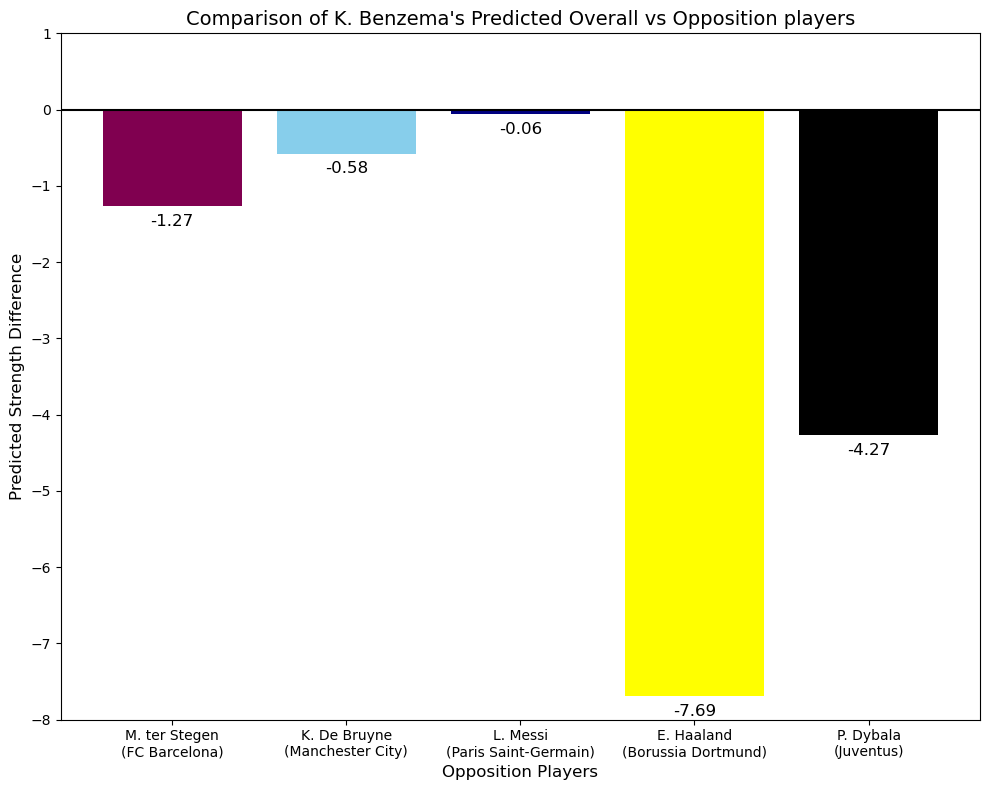

In [85]:
# Data: Predicted Strength Difference for K. Benzema vs Opposition players
players = ['M. ter Stegen\n(FC Barcelona)', 'K. De Bruyne\n(Manchester City)', 
           'L. Messi\n(Paris Saint-Germain)', 'E. Haaland\n(Borussia Dortmund)', 
           'P. Dybala\n(Juventus)']
predicted_strength_diff = [-1.27, -0.58, -0.06, -7.69, -4.27]

# Bar plot to visualize the comparison
plt.figure(figsize=(10, 8))  # Adjusting size for readability

# Create the bar chart
bars = plt.bar(players, predicted_strength_diff, color=['#800050', 'skyblue', 'navy', 'yellow', 'black'])

# Add title and labels
plt.title("Comparison of K. Benzema's Predicted Overall vs Opposition players", fontsize=14)
plt.xlabel('Opposition Players', fontsize=12)
plt.ylabel('Predicted Strength Difference', fontsize=12)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05 if yval > 0 else yval - 0.1, 
             f'{yval:.2f}', ha='center', va='bottom' if yval > 0 else 'top', fontsize=12)

# Add horizontal line at y=0 for easier comparison
plt.axhline(0, color='black', linewidth=1.5)

# Set y-axis limits from -8 to 1
plt.ylim(-8, 1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')  # Players' names and clubs will now appear directly under each other

# Show the plot
plt.tight_layout()  # Ensure everything fits into the figure
plt.show()
